In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from tqdm import tqdm
from sklearn.gaussian_process.kernels import Matern
import math

from IPython.display import set_matplotlib_formats
from matplotlib import cm
set_matplotlib_formats("pdf", "png")
# plt.tight_layout()
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.titlesize"] = 28
plt.rcParams["font.size"] = 28
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["lines.markersize"] = 7
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.linewidth"] = 1.0
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["axes.labelsize"] = 22
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath, amssymb}']

from scipy.stats import multivariate_normal


/var/folders/3t/9g44xm4n6f74bm1skbg0kxdc0000gn/T/ipykernel_6391/2909602909.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "png")
/var/folders/3t/9g44xm4n6f74bm1skbg0kxdc0000gn/T/ipykernel_6391/2909602909.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath, amssymb}']


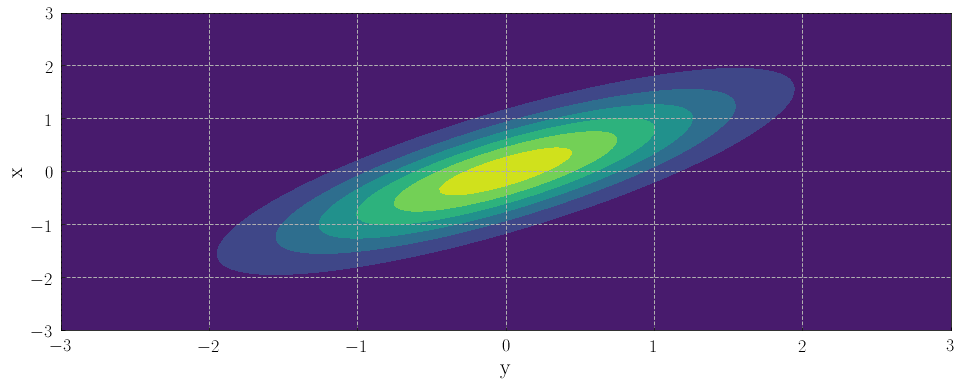

In [2]:
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])


cov = np.array([[1, 0.8], [0.8, 1]])
precision = np.linalg.inv(cov)
# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix
distr = multivariate_normal(cov = cov, mean = mean,
                            seed = random_seed)

# Generating a meshgrid complacent with
# the 3-sigma boundary
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]

x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
        
plt.subplot(1,1,1)
plt.contourf(X, Y, pdf)
plt.xlabel("y")
plt.ylabel("x")
plt.tight_layout()
plt.show()

<font size="5">
    The conditional distribution is
    \begin{aligned}
    \boldsymbol{\mu}_{a \mid b} &=\boldsymbol{\mu}_a+\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1}\left(\mathbf{x}_b-\boldsymbol{\mu}_b\right) \\
    \boldsymbol{\Sigma}_{a \mid b} &=\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}
    \end{aligned}
<font>



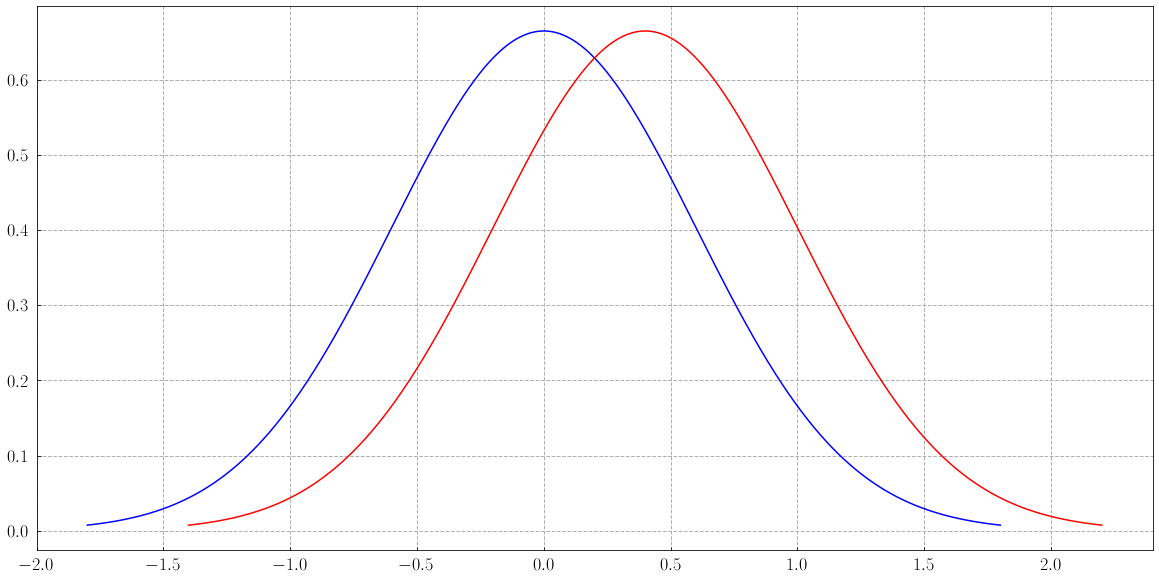

In [3]:
plt.figure(figsize=(20, 10))

x1 = 0
mu_y_x = 0.8 * x1
cov_y_x = 1 - 0.8 * 0.8
precision_y_x = cov_y_x ** (-1)

Y = np.linspace(mu_y_x - 3 * np.sqrt(cov_y_x), mu_y_x + 3 * np.sqrt(cov_y_x), num=1000)
pdf_y_x = 0 * Y
for i in range(len(pdf_y_x)):
    pdf_y_x[i] = (np.sqrt(2 * math.pi) * np.sqrt(cov_y_x)) ** (-1) * np.exp(-0.5 * (Y[i] - mu_y_x) * precision_y_x * (Y[i] - mu_y_x))
plt.plot(Y, pdf_y_x, color = 'b')

x2 = 0.5
mu_y_x = 0.8 * x2
cov_y_x = 1 - 0.8 * 0.8
precision_y_x = cov_y_x ** (-1)

Y = np.linspace(mu_y_x - 3 * np.sqrt(cov_y_x), mu_y_x + 3 * np.sqrt(cov_y_x), num=1000)
pdf_y_x = 0 * Y
for i in range(len(pdf_y_x)):
    pdf_y_x[i] = (np.sqrt(2 * math.pi) * np.sqrt(cov_y_x)) ** (-1) * np.exp(-0.5 * (Y[i] - mu_y_x) * precision_y_x * (Y[i] - mu_y_x))
plt.plot(Y, pdf_y_x, color = 'r')

plt.show()

<font size="5">
    The function g of interest is 
    $$
    g = \exp(-\frac{1}{2} y^2)
    $$
    and the Kernel we use is a RBF kernel
    $$
    k(y, y') = \exp(-\frac{1}{2 \sigma^2}(y-y')^2)
    $$
    And the RBF kernel integrated wrt a Gaussian measure gives us
    $$
    \int_{\mathcal{Y}} k_{\mathcal{Y}}\left(y, y^{\prime}\right)^{\top} \mathcal{N}\left(y^{\prime} ; m_\theta(x), k_\theta(x, x)\right) \mathrm{d} y^{\prime}
    = \\
    |\left[\operatorname{Id}+k_\theta(x, x) \sigma^{-2}\right]|^{-1 / 2} \exp \left(-\frac{1}{2}\left(y-m_\theta(x)\right)^{\top}\left(\sigma^2 + k_\theta(x, x)\right)^{-1}\left(y-m_\theta(x)\right)\right)
    $$
<font>


<font size="5">
    First, we do standard Bayesian Quadrature to verify.
<font>


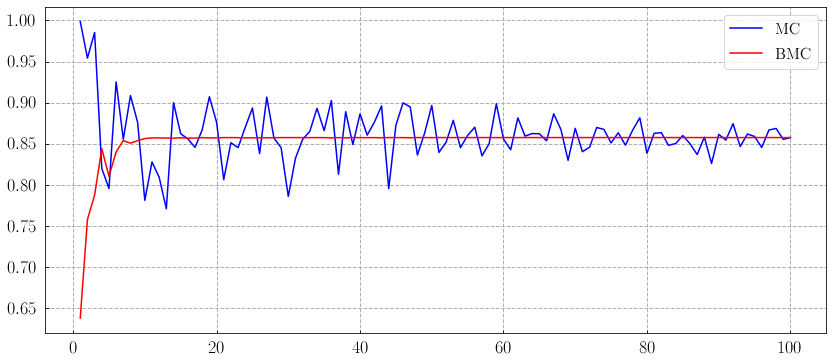

In [4]:
x0 = 0
mu_y_x = 0.8 * x1
cov_y_x = 1 - 0.8 * 0.8
precision_y_x = cov_y_x ** (-1)
eps = 1e-10

from sklearn.gaussian_process.kernels import RBF

MC_list = []
BMC_list = []

def int_K(mu, cov, y):
    return (1 + cov * sigma ** (-2)) ** (-0.5) * np.exp(-0.5 * (sigma ** 2 + cov) ** (-1) * (y - mu) ** 2)
    
N = 100
sigma = 0.5

for n in range(1, N+1):
    y_samples = np.random.normal(loc=mu_y_x, scale=np.sqrt(cov_y_x), size=n)[:, None]
    
    int_MC = np.exp(-0.5 * (y_samples ** 2)).mean()
    
    K_mean = int_K(mu_y_x, cov_y_x, y_samples)
    K = RBF(length_scale = sigma)(y_samples, y_samples) + eps * np.eye(n)
    gY = np.exp(-0.5 * (y_samples ** 2))
    int_BMC = (K_mean.T @ np.linalg.inv(K) @ gY)[0]
    
    MC_list.append(int_MC)
    BMC_list.append(int_BMC)
    
plt.figure()
plt.plot(np.arange(1, 101), MC_list, color = 'b', label='MC')
plt.plot(np.arange(1, 101), BMC_list, color = 'r', label='BMC')
plt.legend()
plt.show()

<font size="5">
    The standard case works well! Let's now go to the conditional case.
    The conditioning value is set at 0.5, and the observed value is 0.1, 0.2, 0.3, 0.4.
    And the kernel on X is also a RBF kernel 
    $$
    k(x, x') = \exp(-\frac{1}{2 \sigma^2}(x-x')^2)
    $$
<font>


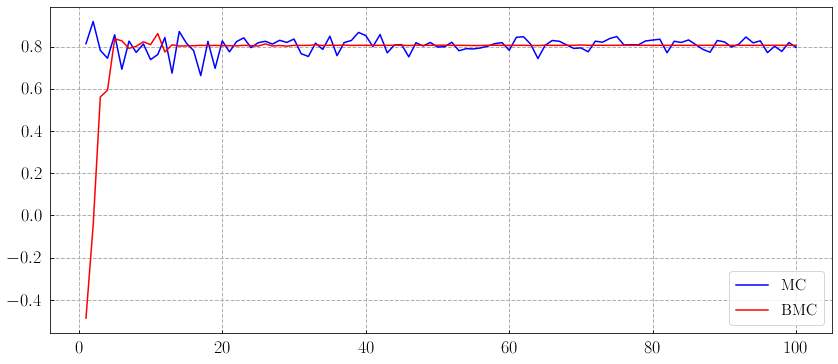

In [5]:
N = 100
sigma = 0.5

x_obs = np.array([0.1, 0.2, 0.3, 0.4])[:, None]
x_pred = 0.5

MC_list = []
mu_y_x = 0.8 * x_pred
cov_y_x = 1 - 0.8 * 0.8
precision_y_x = cov_y_x ** (-1)
# The MC is based on the conditioning distribution on the true value.
for n in range(1, N+1):
    y_samples = np.random.normal(loc=mu_y_x, scale=np.sqrt(cov_y_x), size=n)[:, None]
    int_MC = np.exp(-0.5 * (y_samples ** 2)).mean()
    MC_list.append(int_MC)
    
BMC_list = []
for n in range(1, N+1):
    int_BMC_obs = []
    for x in x_obs:
        mu_y_x = 0.8 * x
        cov_y_x = 1 - 0.8 * 0.8
        precision_y_x = cov_y_x ** (-1)
        y_samples = np.random.normal(loc=mu_y_x, scale=np.sqrt(cov_y_x), size=n)[:, None]
    
        int_MC = np.exp(-0.5 * (y_samples ** 2)).mean()
    
        K_mean = int_K(mu_y_x, cov_y_x, y_samples)
        K = RBF(length_scale = sigma)(y_samples, y_samples) + eps * np.eye(n)
        gY = np.exp(-0.5 * (y_samples ** 2))
        int_BMC_obs.append((K_mean.T @ np.linalg.inv(K) @ gY)[0])
    
    int_BMC_obs = np.array(int_BMC_obs)
    x_pred = np.array([0.5])[:, None]
    Kx = RBF(length_scale = 0.5)(x_obs, x_obs) + eps * np.eye(len(x_obs))
    int_BMC = (RBF(length_scale = 0.5)(x_pred, x_obs) @ np.linalg.inv(Kx) @ int_BMC_obs)[0]
    BMC_list.append(int_BMC)

plt.figure()
plt.plot(np.arange(1, 101), MC_list, color = 'b', label='MC')
plt.plot(np.arange(1, 101), BMC_list, color = 'r', label='BMC')
plt.legend()
plt.show()

<font size="5">
    Finally we add optimization of the hyperparameter - the length scale.
<font>


In [ ]:
import torch
from torch.autograd import grad
from torch import optim


def RBF_kernel(x_tensor, y_tensor, sigma):
    r = torch.cdist(x_tensor, y_tensor, p=2)
    return torch.exp(- 0.5 * (sigma ** (-2)) * (r ** 2))

n_max = 10
l_list = []

log_l = torch.tensor([1.0], requires_grad=True)
optimizer = optim.Adam([log_l], lr=0.03)
eps = 1e-6
    
for n in range(1, n_max+1):
    int_BMC_obs = []
    y_samples_all = torch.zeros([n * len(x_obs), 1])
    
    for i, x in enumerate(x_obs):
        mu_y_x = 0.8 * x
        cov_y_x = 1 - 0.8 * 0.8
        precision_y_x = cov_y_x ** (-1)
        y_samples = torch.normal(mean=mu_y_x[0], std=np.sqrt(cov_y_x), size=(n,1))
        y_samples_all[i * n:(i+1) * n, :] = y_samples
        
    gy = torch.exp(-0.5 * y_samples_all ** 2)


    llk_curr = torch.tensor([0.0])
    llk = torch.tensor([1.0])

    while (torch.abs(llk_curr - llk) > 0.001):
        llk_curr = llk
        l = torch.exp(log_l)
        K = RBF_kernel(y_samples_all, y_samples_all, l)
        K_inv = torch.inverse((K + eps * torch.eye(n * len(x_obs))))
        llk = (-0.5 * gy.T @ K_inv @ gy - 0.5 * torch.log(torch.det(K) + eps)) / (n * len(x_obs))
        nll = -llk
        nll.backward()
        optimizer.step()
        # print(llk.detach())
        # print(torch.exp(log_l))
    l_list.append(torch.exp(log_l).detach().numpy())

plt.figure()
plt.plot(range(1, n_max+1), l_list)
plt.title("The optimization of length scale under maximum log-likelihood.")
plt.xlabel("The number of observations.")
plt.ylabel("length scale")
plt.show()

In [ ]:
n